## GPU usage

In [1]:
from numba import jit, cuda 
import numpy as np 
# to measure exec time 
from timeit import default_timer as timer    
  
# normal function to run on cpu 
def func(a):                                 
    for i in range(10000000): 
        a[i]+= 1      
  
# function optimized to run on gpu  
@jit(target ="cuda")                          
def func2(a): 
    for i in range(10000000): 
        a[i]+= 1
if __name__=="__main__": 
    n = 10000000                            
    a = np.ones(n, dtype = np.float64) 
    b = np.ones(n, dtype = np.float32) 
      
    start = timer() 
    func(a) 
    print("without GPU:", timer()-start)     
      
    start = timer() 
    func2(a) 
    print("with GPU:", timer()-start)

without GPU: 6.307576364008128


CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:

## word2vec model

In [1]:
#Vector values
%store -r X1
#Tokens
%store -r X2 

## Equal-sized clusters - methods

#### 1. Iterative Dichotomy

In [ ]:
knitr::opts_chunk$set(message=FALSE, echo=FALSE, warning=FALSE, fig.width=10)
```

```{r}
library(ape)
library(ggplot2)
library(dplyr)
library(magrittr)
library(tidyr)
library(cluster)
## Winsorize a vector
winsor <- function(x, u){
  if(any(x>u)) x[x>u] = u

In [ ]:
hclustit <- function(mat, clsize = 10, method='ward.D', split.th=1.5){
  lab = rep('l', nrow(mat))
  lab.size = table(lab)
  while(any(lab.size>clsize*split.th)){
    lab.ii = which(lab == names(lab.size)[which.max(lab.size)])
    mmat = mat[lab.ii,]
    hc.o = hclust(dist(mmat), method=method)
    lab[lab.ii] = paste0(lab[lab.ii], '-', cutree(hc.o, 2))
    lab.size = table(lab)
  }
  lab
}

['setosa' 'versicolor' 'virginica']


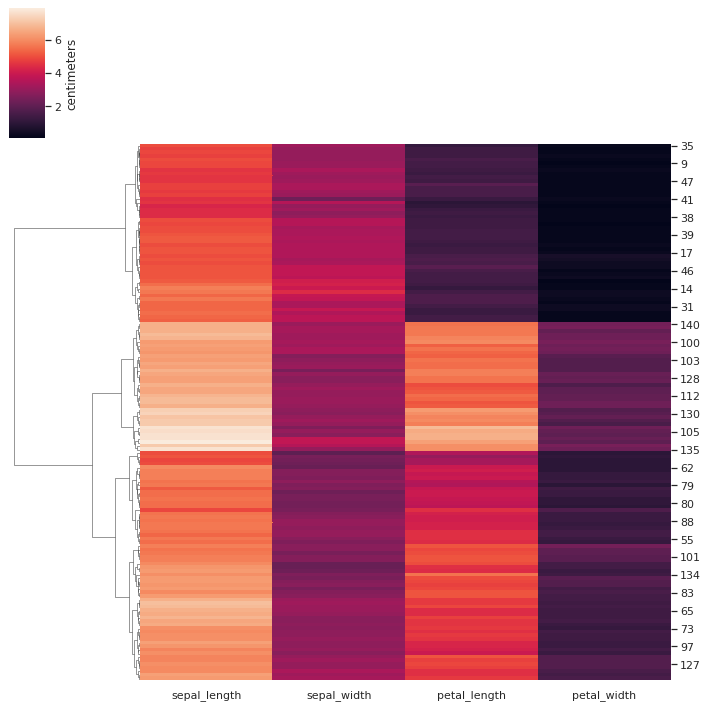

In [2]:
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")   # Remove the species column
print(species.unique())         # The samples seems to be from these three species
sns.clustermap(iris, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'})

#### Hierarchical Clustering (Agglomerative)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%store -r X0

In [3]:
from sklearn.manifold import SpectralEmbedding
n_dim = 2
embeddings = SpectralEmbedding(n_components=n_dim)

In [4]:
subjects = pd.DataFrame(
    embeddings.fit_transform(X0),
    columns=['x{}'.format(i) for i in range(n_dim)])

In [5]:
df = pd.DataFrame(subjects)
df

,x0,x1
0,-0.001486,0.001772
1,-0.000155,-0.001716
2,0.000852,-0.001446
3,-0.001345,0.000954
4,-0.001600,0.002195
...,...,...
2338,0.001604,-0.000359
2339,0.001088,-0.001092
2340,-0.000815,-0.000715
2341,0.001685,0.000011


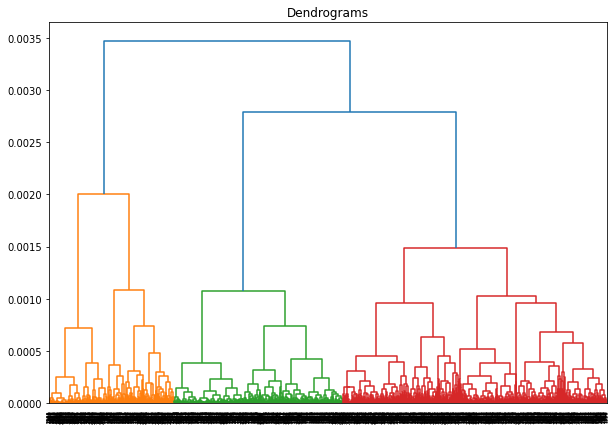

In [100]:
#Number of Clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='average'))

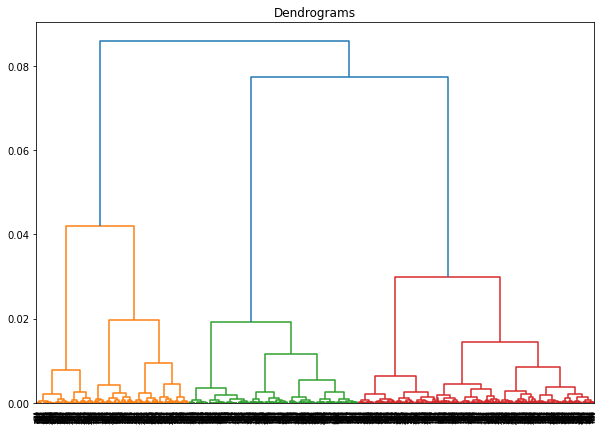

In [101]:
#Number of Clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

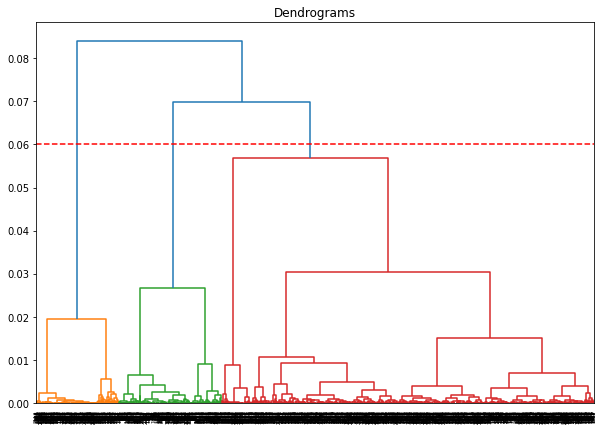

In [79]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(y=0.06, color='r', linestyle='--')

In [6]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
label = cluster.fit_predict(df)
label

array([2, 1, 1, ..., 1, 0, 2])

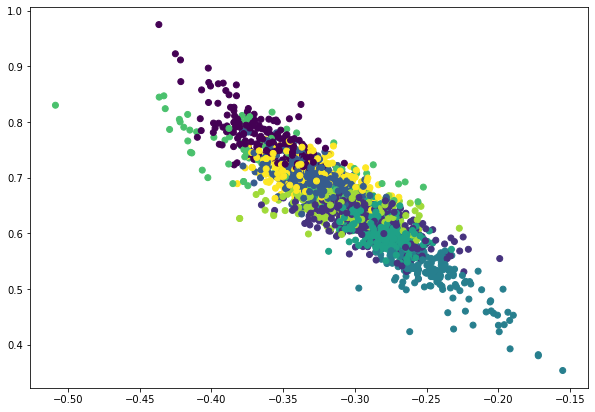

In [11]:
plt.figure(figsize=(10, 7))  
plt.scatter(df[2], df[1], c=cluster.labels_) 

In [75]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')  
label2 = cluster.fit_predict(df)
label2

array([2, 1, 4, ..., 1, 0, 2])

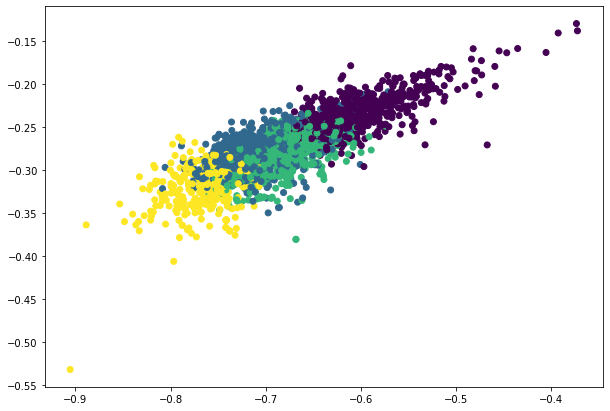

In [15]:
plt.figure(figsize=(10, 7))  
plt.scatter(df[0], df[50], c=cluster.labels_) 

In [7]:
c0=0
c1=0
c2=0

for i in label:
    if(i==0):
        c0=c0+1
    elif(i==1):
        c1=c1+1
    else:
        c2=c2+1
print(c0)
print(c1)
print(c2)

526
1107
710


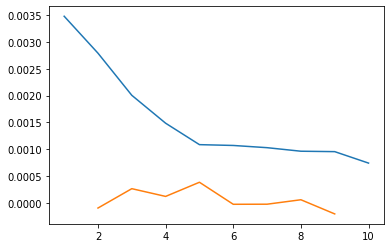

clusters: 5


In [9]:
#Elbow plot
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df, 'average')
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [77]:
Z[-4:,2]

array([0.00148439, 0.00200426, 0.0027888 , 0.00347735])

In [97]:
s = subjects.to_numpy()

In [94]:
df0 = pd.DataFrame(subjects)
s0 = df0.to_numpy()

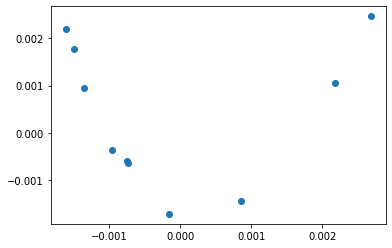

In [98]:
plt.scatter(s[0:10,0], s[0:10,1])
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [16]:
#Embedding dim=3
silhouette_avg = silhouette_score(subjects, label)
silhouette_avg

0.5908479903722514

In [17]:
davies_bouldin_score(subjects, label)

0.5518770644257627

In [10]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(df))
c

0.81631657891613

In [11]:
#Cluster-wise separation of regulations
t=-1
rid0 = []
rid1 = []
rid2 = []

for i in label:
    t=t+1
    if(i==0):
        rid0.append(t)
    elif(i==1):
        rid1.append(t)
    else:
        rid2.append(t)

In [12]:
import pandas as pd
ins = pd.read_csv('../data/final_rules.csv')
corpus = ins['text'].tolist()

In [13]:
r0 = []
r1 = []
r2 = []

for i in rid0:
    r0.append(corpus[i])
for i in rid1:
    r1.append(corpus[i])
for i in rid2:
    r2.append(corpus[i])

In [14]:
df0 = pd.DataFrame(r0)
df0.to_csv('reg0-hiespec.csv', index=False)
df1 = pd.DataFrame(r1)
df1.to_csv('reg1-hiespec.csv', index=False)
df2 = pd.DataFrame(r2)
df2.to_csv('reg2-hiespec.csv', index=False)

In [96]:
#Cluster-wise separation of regulations' vector values
t=-1
r0 = []
rid0 = []
r1 = []
rid1 = []
r2 = []
rid2 = []
#r3 = []
#rid3 = []
for i in label:
    t=t+1
    if(i==0):
        r0.append(X0[t])
        rid0.append(t)
    elif(i==1):
        r1.append(X0[t])
        rid1.append(t)
    #elif(i==2):
    #    r2.append(X0[t])
    #    rid2.append(t)
    else:
        r2.append(X0[t])
        rid2.append(t)

In [97]:
labels = pd.DataFrame(label,columns=['target'])

#### PCA

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X0)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

In [56]:
pca.get_params

<bound method BaseEstimator.get_params of PCA(n_components=5)>

In [51]:
finalDf = pd.concat([principalDf, labels], axis = 1)

In [52]:
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,target
0,-0.746799,0.619984,0.141660,0.051003,-0.012131,1
1,0.026652,0.033293,0.026638,0.027291,0.013364,2
2,0.209674,0.136698,-0.036992,0.085678,0.060313,0
3,-0.328287,-0.103865,0.014431,0.074963,-0.060319,2
4,-0.897524,0.101194,0.236069,0.004179,-0.018624,1
...,...,...,...,...,...,...
2338,0.356083,0.099370,0.007326,0.039737,0.041379,0
2339,0.270393,-0.214386,0.071421,-0.024998,-0.025753,0
2340,-0.163115,-0.207852,-0.038469,-0.048571,-0.047190,2
2341,0.409688,-0.255061,-0.000788,-0.033911,-0.053290,0


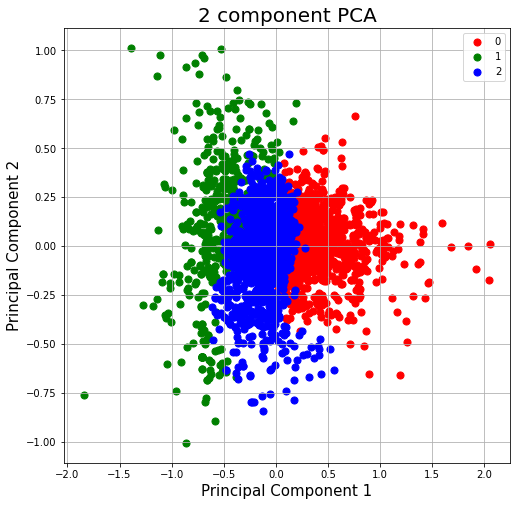

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [47]:
pca.explained_variance_ratio_

array([0.67075964, 0.22600949])

## Clusters validation

#### silhouette_score

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [8]:
#Embedding dim=3
silhouette_avg = silhouette_score(subjects, label)
silhouette_avg

0.5908479903722443

In [11]:
davies_bouldin_score(subjects, label)

0.551877064425763

In [9]:
#Embedding dim=4
silhouette_avg = silhouette_score(subjects, label)
silhouette_avg

0.5713336520169344

In [76]:
#Embedding dim=5
silhouette_avg = silhouette_score(subjects, label2)
silhouette_avg

0.5430187910049907

#### Dunn index

In [10]:
def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)

def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

In [13]:
rv0 = []
rv1 = []
rv2 = []

for i in rid0:
    rv0.append(X0[i])
for i in rid1:
    rv1.append(X0[i])
for i in rid2:
    rv2.append(X0[i])

In [14]:
a0 = np.array(rv0)
a1 = np.array(rv1)
a2 = np.array(rv2)

In [15]:
cluster_list = [a0,a1,a2] 
  
print(dunn(cluster_list))

0.007298408968761881


In [7]:
#Clusters centroids calculation
#Cluster0
jlist = [0]*100
c=0
s=[]
for i in r0:
    for k in range(0, len(i)): 
        s.append(i[k] + jlist[k]) 
    jlist=s
    s=[]
    #print(len(jlist))
    c=c+1
t=-1
for l in jlist:
    t=t+1
    l=l/c
    jlist[t] = l
cent0 = jlist

In [8]:
#Cluster1
jlist = [0]*100
c=0
s=[]
for i in r1:
    for k in range(0, len(i)): 
        s.append(i[k] + jlist[k]) 
    jlist=s
    s=[]
    #print(len(jlist))
    c=c+1
t=-1
for l in jlist:
    t=t+1
    l=l/c
    jlist[t] = l
cent1 = jlist

In [9]:
#Cluster2
jlist = [0]*100
c=0
s=[]
for i in r2:
    for k in range(0, len(i)): 
        s.append(i[k] + jlist[k]) 
    jlist=s
    s=[]
    #print(len(jlist))
    c=c+1
t=-1
for l in jlist:
    t=t+1
    l=l/c
    jlist[t] = l
cent2 = jlist

In [113]:
'''
#Cluster3
jlist = [0]*100
c=0
s=[]
for i in r3:
    for k in range(0, len(i)): 
        s.append(i[k] + jlist[k]) 
    jlist=s
    s=[]
    #print(len(jlist))
    c=c+1
t=-1
for l in jlist:
    t=t+1
    if(c==0):
        l=l
    else:
        l=l/c
    jlist[t] = l
cent3 = jlist
'''

In [15]:
#Cosine similarity within cluster - ascending order

from numpy import dot
from numpy.linalg import norm

def takeThird(elem):
    return elem[2]

In [16]:
#Cluster0
cos0 = []
i=0
while(i<len(r0)-1):
    j=len(r0)-1
    while(j>i):
        cos_sim = dot(r0[i], r0[j])/(norm(r0[i])*norm(r0[j]))
        cos0.append([rid0[i],rid0[j],cos_sim])
        j=j-1
    i=i+1
cos0.sort(key=takeThird)

In [17]:
#Sorting regulations with cosine score
ind0 = []
cs_ind0 = []
counter0 = []
for i in cos0:
    if(i[0] not in ind0):
        ind0.append(i[0])
        counter0.append(1)
        cs_ind0.append(i[2])
    else:
        t=0
        while(t<len(ind0)):
            if(ind0[t] == i[0]):
                cs_ind0[t] = cs_ind0[t]+i[2]
                counter0[t] = counter0[t]+1
                break
            t=t+1
    if(i[1] not in ind0):
        ind0.append(i[1])
        counter0.append(1)
        cs_ind0.append(i[2])
    else:
        t=0
        while(t<len(ind0)):
            if(ind0[t] == i[1]):
                cs_ind0[t] = cs_ind0[t]+i[2]
                counter0[t] = counter0[t]+1
                break
            t=t+1
p=0
while(p<len(cs_ind0)):
    cs_ind0[p] = cs_ind0[p]/counter0[p]
    p=p+1
    
zipped_lists = zip(cs_ind0, ind0)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
cs_ind0, ind0 = [ list(tuple) for tuple in tuples]

In [18]:
#Cluster1
cos1 = []
i=0
while(i<len(r1)-1):
    j=len(r1)-1
    while(j>i):
        cos_sim = dot(r1[i], r1[j])/(norm(r1[i])*norm(r1[j]))
        cos1.append([rid1[i],rid1[j],cos_sim])
        j=j-1
    i=i+1
cos1.sort(key=takeThird)

In [19]:
ind1 = []
cs_ind1 = []
counter1 = []
for i in cos1:
    if(i[0] not in ind1):
        ind1.append(i[0])
        counter1.append(1)
        cs_ind1.append(i[2])
    else:
        t=0
        while(t<len(ind1)):
            if(ind1[t] == i[0]):
                cs_ind1[t] = cs_ind1[t]+i[2]
                counter1[t] = counter1[t]+1
                break
            t=t+1
    if(i[1] not in ind1):
        ind1.append(i[1])
        counter1.append(1)
        cs_ind1.append(i[2])
    else:
        t=0
        while(t<len(ind1)):
            if(ind1[t] == i[1]):
                cs_ind1[t] = cs_ind1[t]+i[2]
                counter1[t] = counter1[t]+1
                break
            t=t+1
p=0
while(p<len(cs_ind1)):
    cs_ind1[p] = cs_ind1[p]/counter1[p]
    p=p+1

zipped_lists = zip(cs_ind1, ind1)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
cs_ind1, ind1 = [ list(tuple) for tuple in tuples]

In [20]:
#Cluster2
cos2 = []
i=0
while(i<len(r2)-1):
    j=len(r2)-1
    while(j>i):
        cos_sim = dot(r2[i], r2[j])/(norm(r2[i])*norm(r2[j]))
        cos2.append([rid2[i],rid2[j],cos_sim])
        j=j-1
    i=i+1
cos2.sort(key=takeThird)

In [21]:
#Sorting regulations with cosine score
ind2 = []
cs_ind2 = []
counter2 = []
for i in cos2:
    if(i[0] not in ind2):
        ind2.append(i[0])
        counter2.append(1)
        cs_ind2.append(i[2])
    else:
        t=0
        while(t<len(ind2)):
            if(ind2[t] == i[0]):
                cs_ind2[t] = cs_ind2[t]+i[2]
                counter2[t] = counter2[t]+1
                break
            t=t+1
    if(i[1] not in ind2):
        ind2.append(i[1])
        counter2.append(1)
        cs_ind2.append(i[2])
    else:
        t=0
        while(t<len(ind2)):
            if(ind2[t] == i[1]):
                cs_ind2[t] = cs_ind2[t]+i[2]
                counter2[t] = counter2[t]+1
                break
            t=t+1
p=0
while(p<len(cs_ind2)):
    cs_ind2[p] = cs_ind2[p]/counter2[p]
    p=p+1
    
zipped_lists = zip(cs_ind2, ind2)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
cs_ind2, ind2 = [ list(tuple) for tuple in tuples]

In [114]:
'''
#Cluster3
cos3 = []
i=0
while(i<len(r3)-1):
    j=len(r3)-1
    while(j>i):
        cos_sim = dot(r3[i], r3[j])/(norm(r3[i])*norm(r3[j]))
        cos3.append([rid3[i],rid3[j],cos_sim])
        j=j-1
    i=i+1
cos3.sort(key=takeThird)
'''

In [115]:
'''
#Sorting regulations with cosine score
ind3 = []
cs_ind3 = []
counter3 = []
for i in cos3:
    if(i[0] not in ind3):
        ind3.append(i[0])
        counter3.append(1)
        cs_ind3.append(i[2])
    else:
        t=0
        while(t<len(ind3)):
            if(ind3[t] == i[0]):
                cs_ind3[t] = cs_ind3[t]+i[2]
                counter3[t] = counter3[t]+1
                break
            t=t+1
    if(i[1] not in ind3):
        ind3.append(i[1])
        counter3.append(1)
        cs_ind3.append(i[2])
    else:
        t=0
        while(t<len(ind3)):
            if(ind3[t] == i[1]):
                cs_ind3[t] = cs_ind3[t]+i[2]
                counter3[t] = counter3[t]+1
                break
            t=t+1
p=0
while(p<len(cs_ind3)):
    cs_ind3[p] = cs_ind3[p]/counter3[p]
    p=p+1
    
zipped_lists = zip(cs_ind3, ind3)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
cs_ind3, ind3 = [ list(tuple) for tuple in tuples]
'''

In [12]:
#Cluster-wise separation of regulations
t=-1
rid0 = []
rid1 = []
rid2 = []

for i in label:
    t=t+1
    if(i==0):
        rid0.append(t)
    elif(i==1):
        rid1.append(t)
    else:
        rid2.append(t)

In [11]:
import pandas as pd
ins = pd.read_csv('../data/final_rules.csv')
corpus = ins['text'].tolist()

In [12]:
r0 = []
r1 = []
r2 = []

for i in rid0:
    r0.append(corpus[i])
for i in rid1:
    r1.append(corpus[i])
for i in rid2:
    r2.append(corpus[i])

In [15]:
df0 = pd.DataFrame(r0)
df0.to_csv('reg0-hieorig.csv', index=False)
df1 = pd.DataFrame(r1)
df1.to_csv('reg1-hieorig.csv', index=False)
df2 = pd.DataFrame(r2)
df2.to_csv('reg2-hieorig.csv', index=False)

In [13]:
r0

['  Provided that where credit ratings are obtained from more than one credit rating agency, all the ratings, including the unaccepted ratings, shall be disclosed in the offer document or placement memorandum, as applicable.\n                 ',
 ' 5.(1) An issuer making public issue of debt securities shall only issue revenue bonds.\n                 ',
 ' (6)The issuer shall create a separate escrow account for servicing of revenue bonds with earmarked revenue.\n                 ',
 ' 6.(1) The offer document shall contain true, fair and material disclosures, which are necessary for the subscribers of the revenue bonds to take an informed investment decision.\n                 ',
 ' 6A. (1)The issuer shall appoint one or more merchant bankers, which are registered with the Board, as lead manager(s) to the issue.\n                 ',
 ' (2)Where the issue is managed by more than one lead manager, the rights, obligations and responsibilities, relating to disclosures, allotment, refund 

## Topic Analysis - Clusterwise

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from utils import LemmaTokenizer, combined_plots

/home/deepti-saravanan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [19]:
%store -r lol

In [20]:
counter = CountVectorizer(tokenizer=LemmaTokenizer())
subj = pd.DataFrame(
    counter.fit_transform(lol.astype(str)).toarray(),
    columns=counter.get_feature_names()
)

In [32]:
%store -r vaelabel

In [42]:
subj['label'] = vaelabel

In [43]:
groups = pd.melt(
    subj.groupby('label').sum().reset_index(),
    id_vars='label', var_name='word', value_name='count'
).groupby('label').apply(lambda group: group.sort_values(by='count', ascending=False)).reset_index(drop=True)

In [44]:
groups.to_csv('vae-lda.csv',index=False)

In [45]:
pipeline = Pipeline([
    ('counts', CountVectorizer(max_features=100, tokenizer=LemmaTokenizer())),
    ('lda', LatentDirichletAllocation(n_components=3, learning_decay=0.5, max_iter=10, random_state=1))
])

In [46]:
pipeline.fit(lol)

Pipeline(steps=[('counts',
                 CountVectorizer(max_features=100,
                                 tokenizer=<utils.LemmaTokenizer object at 0x7f09ea890c88>)),
                ('lda',
                 LatentDirichletAllocation(learning_decay=0.5, n_components=3,
                                           random_state=1))])

In [47]:
vectorizer = pipeline.named_steps['counts']
dtm = vectorizer.fit_transform(lol)

In [48]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [49]:
p = pyLDAvis.sklearn.prepare(pipeline.named_steps['lda'], dtm, vectorizer)

#### Hie-Spec

In [31]:
pyLDAvis.display(p)

#### VAE

In [50]:
pyLDAvis.display(p)

In [51]:
p_df = p.topic_info
l=0
tlist = []
flist = []
while(l<p_df.shape[0]):
    if(p_df.iloc[l]['Category'] != 'Default'):
        tlist.append(p_df.iloc[l]['Term'])
        flist.append(p_df.iloc[l]['Total'])
    l = l+1

In [52]:
account = ['accounting',
 'acquirer',
 'acquisition',
 'agency',
 'audit',
 'bond',
 'broker',
 'capital',
 'cash',
 'chairman',
 'charge',
 'control',
 'cost',
 'coupon',
 'credit',
 'debenture',
 'default',
 'director',
 'dividend',
 'entity',
 'equity',
 'expense',
 'format',
 'group',
 'inventory',
 'management',
 'margin',
 'material',
 'materiality',
 'maturity',
 'memorandum',
 'merger',
 'net',
 'partnership',
 'portfolio',
 'principal',
 'profit',
 'prospectus',
 'provision',
 'recognition',
 'return',
 'revenue',
 'risk',
 'stock',
 'substance',
 'turnover',
 'unlisted',
 'agent',
 'asset',
 'associate',
 'business',
 'derivative',
 'development',
 'income',
 'lease',
 'liability',
 'performance',
 'probable',
 'loss',
 'research',
 'restriction',
 'state',
 'subsidiary',
 'vest',
 'yield']

In [53]:
finance = ['account',
 'ask',
 'asset',
 'basis',
 'bid',
 'broker',
 'business',
 'buy',
 'commission',
 'debenture',
 'distributions',
 'dividend',
 'equity',
 'exchange',
 'growth',
 'income',
 'holding',
 'information',
 'institution',
 'interest',
 'investment',
 'issuer',
 'leverage',
 'lot',
 'maturity',
 'option',
 'options',
 'portfolio',
 'price',
 'principal',
 'proceeds',
 'prospectus',
 'quantity',
 'right',
 'sales',
 'sell',
 'symbol',
 'trade',
 'unit',
 'vesting',
 'volume',
 'warrants',
 'default',
 'insurance',
 'litigation']

In [54]:
cap_market = ['acquirer',
 'adviser',
 'analyst',
 'intermediary',
 'arbitration',
 'securities',
 'auction',
 'auditor',
 'authorized',
 'authority',
 'badla',
 'basis',
 'bear',
 'bid',
 'break',
 'broker',
 'brokerage',
 'market',
 'clearing',
 'cover',
 'custodian',
 'debentures',
 'delivery',
 'dematerialise',
 'depository',
 'derivative',
 'disclosure',
 'distribution',
 'dividend',
 'equity',
 'exchange',
 'gross',
 'hypothecation',
 'director',
 'insider',
 'trading',
 'interest',
 'investment',
 'issuer',
 'leverage',
 'liabilities',
 'liquidation',
 'company',
 'listed',
 'list',
 'listing',
 'security',
 'key',
 'manager',
 'managerial',
 'margin',
 'maturity',
 'merger',
 'netting',
 'option',
 'plan',
 'person',
 'pooling',
 'portfolio',
 'premium',
 'price',
 'sensitive',
 'information',
 'prospectus',
 'proxy',
 'transferee',
 'transferor',
 'trustee',
 'underlying',
 'underwriter',
 'underwriting',
 'value',
 'vesting',
 'warrant',
 'stock',
 'settlement',
 'invest',
 'promoter']

In [55]:
comm_market = ['basis',
 'bear',
 'bid',
 'breaking',
 'call',
 'close',
 'cover',
 'delivery',
 'contract',
 'limit',
 'liquidation',
 'local',
 'long',
 'margin',
 'offer',
 'opening',
 'put',
 'point',
 'position',
 'premium',
 'range',
 'reaction',
 'short',
 'purchase',
 'sale',
 'merchant']

In [56]:
pension = ['accrued',
 'administrator',
 'benefit',
 'asset',
 'retirement',
 'member',
 'pension']

In [57]:
banking = ['mortgages',
 'alteration',
 'application',
 'authorization',
 'bank',
 'bankruptcy',
 'deposit',
 'collateral',
 'disclosures',
 'draft',
 'escrow',
 'fiduciary',
 'hold',
 'insurance',
 'interest',
 'lease',
 'lender',
 'lien',
 'maturity',
 'mortgage',
 'payment',
 'reconciliation',
 'refund',
 'renewal',
 'safekeeping',
 'statement',
 'terms',
 'transfer']

In [58]:
market = []
for i in cap_market:
    if(i not in market):
        market.append(i)
for i in comm_market:
    if(i not in market):
        market.append(i)    
i=0
while(i<35):
    if(finance[i] not in market):
        market.append(finance[i])
    i=i+1
market.append('bond')
market.append('cash')
market.append('capital')
market.append('restriction')
accword = ['credit','entity','expense','inventory','material','materiality','partnership','profit','return','revenue','risk','unlisted','agent','liability','performance','yield']
for i in accword:
    market.append(i)
i=0
while(i<20):
    if(account[i] not in market):
        market.append(account[i])
    i=i+1

#### Tag words for accounting

In [38]:
acc1 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/ifrs_iasb.csv', usecols=['Term'])
acc2 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/uk_gaap.csv', usecols=['Term'])
acc3 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/us_fasb.csv', usecols=['Term'])
acc4 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/us_gaap.csv', usecols=['Term'])
acc5 = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/accounting/us_gasb.csv', usecols=['Term'])

In [39]:
acc1 = acc1.append(acc2)
acc1 = acc1.append(acc3)
acc1 = acc1.append(acc4)
acc1 = acc1.append(acc5)
a11 = acc1.values.tolist()

a1 = []
for i in a11:
    a1.append(i[0])
    
g1 = groups.values.tolist()
g = []
for j in g1:
    g.append(j[1])

In [84]:
account = []

for n in a1:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in account):
                account.append(n)
        k = k+1

In [85]:
account

['accounting',
 'acquirer',
 'acquisition',
 'agency',
 'audit',
 'bond',
 'broker',
 'capital',
 'cash',
 'chairman',
 'charge',
 'control',
 'cost',
 'coupon',
 'credit',
 'debenture',
 'default',
 'director',
 'dividend',
 'entity',
 'equity',
 'expense',
 'format',
 'group',
 'inventory',
 'management',
 'margin',
 'material',
 'materiality',
 'maturity',
 'memorandum',
 'merger',
 'net',
 'partnership',
 'portfolio',
 'principal',
 'profit',
 'prospectus',
 'provision',
 'recognition',
 'return',
 'revenue',
 'risk',
 'stock',
 'substance',
 'turnover',
 'unlisted',
 'agent',
 'asset',
 'associate',
 'business',
 'derivative',
 'development',
 'income',
 'lease',
 'liability',
 'performance',
 'probable',
 'loss',
 'research',
 'restriction',
 'state',
 'subsidiary',
 'vest',
 'yield']

In [59]:
regtext = pd.read_csv('../code/vae-lda.csv')
reg = regtext.values.tolist()
label = []
word = []
freq = []
for i in account:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2]
['accounting', 'acquirer', 'acquirer', 'acquisition', 'acquisition', 'agency', 'agency', 'audit', 'audit', 'bond', 'bond', 'broker', 'capital', 'capital', 'capital', 'cash', 'chairman', 'charge', 'charge', 'control', 'cost', 'cost', 'coupon', 'credit', 'credit', 'debenture', 'debenture', 'default', 'director', 'director', 'director', 'dividend', 'entity', 'entity', 'entity', 'equity', 'equity', 'equity', 'expense', 'format', 'group', 'group', 'inventory', 'management', 'management', 'margin', 'material', 'material', 'materiality', 'maturity', 'memorandum', 'merger', 'net', 'partnership', 'portfolio', 'portfolio', 'portfolio', 'principal', 'profit', 'profit', 'profit', 'prospectu

#### Percentage accounting tag words clusterwise

In [60]:
#Word counts clusterwise
k=0
c0 = 0
c1 = 0
c2 = 0
#c3 = 0

while(k<len(reg)):
    r = reg[k]
    if(r[0] == 0):
        c0 = c0 + r[2]
    elif(r[0] == 1):
        c1 = c1 + r[2]
    #elif(r[0] == 2):
    #    c2 = c2 + r[2]
    else:
        c2 = c2 + r[2]
    k=k+1
print(c0)
print(c1)
print(c2)
#print(c3)

1230
671
15338


In [61]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

26.178861788617887
16.542473919523097
10.262094145260138


#### Relative to global frequency

In [62]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    d=0
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                d=d+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

12.390899012766281
11.345465957178861
81.02689125257527


#### Tag words for finance

In [48]:
fin = pd.read_csv('/home/deepti-saravanan/Desktop/lexpredict-legal-dictionary-master/en/financial/financial.csv', usecols=['term'])

In [49]:
f1 = fin.values.tolist()
f = []
for i in f1:
    f.append(i[0])

In [50]:
finance = []

for n in f:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in finance):
                finance.append(n)
        k = k+1

In [51]:
finance

['account',
 'asset',
 'basis',
 'broker',
 'business',
 'buy',
 'commission',
 'debenture',
 'dividend',
 'equity',
 'exchange',
 'income',
 'holding',
 'information',
 'institution',
 'investment',
 'issuer',
 'lot',
 'maturity',
 'option',
 'portfolio',
 'price',
 'principal',
 'prospectus',
 'quantity',
 'right',
 'sell',
 'trade',
 'turnover',
 'unit',
 'vesting',
 'volume',
 'yield',
 'default',
 'insurance']

In [63]:
regtext = pd.read_csv('../code/vae-lda.csv')
reg = regtext.values.tolist()
label = []
word = []
freq = []
for i in finance:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2]
['account', 'account', 'asset', 'asset', 'basis', 'basis', 'basis', 'broker', 'business', 'buy', 'commission', 'debenture', 'debenture', 'dividend', 'equity', 'equity', 'equity', 'exchange', 'exchange', 'exchange', 'income', 'holding', 'holding', 'holding', 'information', 'information', 'institution', 'institution', 'investment', 'investment', 'issuer', 'issuer', 'issuer', 'lot', 'maturity', 'option', 'option', 'portfolio', 'portfolio', 'portfolio', 'price', 'price', 'principal', 'prospectus', 'quantity', 'right', 'right', 'sell', 'trade', 'trade', 'unit', 'unit', 'unit', 'vesting', 'volume', 'default', 'insurance', 'insurance']
[1, 52, 1, 40, 1, 1, 4, 9, 21, 15, 8, 3, 19, 9, 7, 5, 24, 29, 53, 87, 3, 2, 2, 10, 9, 68, 2, 15, 2, 286, 4, 7, 223, 1, 1, 3, 16, 3, 1, 142, 2, 41, 2, 5, 1, 3, 61, 1, 3, 11, 4, 3, 79, 1, 13

In [64]:
#Word counts clusterwise
k=0
c0 = 0
c1 = 0
c2 = 0
c3 = 0

while(k<len(reg)):
    r = reg[k]
    if(r[0] == 0):
        c0 = c0 + r[2]
    elif(r[0] == 1):
        c1 = c1 + r[2]
    elif(r[0] == 2):
        c2 = c2 + r[2]
    else:
        c3 = c3 + r[2]
    k=k+1
print(c0)
print(c1)
print(c2)
print(c3)

1230
671
15338
0


In [65]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

5.691056910569105
12.220566318926975
8.403964010953189


In [66]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    d=0
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                d=d+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

7.694011231537001
9.447327875877505
86.15776214903995


#### Tag words for Banking

In [56]:
bank = pd.read_csv('/home/deepti-saravanan/Desktop/laws/semantics/code/banking.csv')

In [57]:
b1 = bank.values.tolist()
b2 = []
for i in b1:
    b2.append(i[0])

In [58]:
banking = []

for n in b2:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in banking):
                banking.append(n)
        k = k+1

In [59]:
banking

['affidavit',
 'alteration',
 'application',
 'bank',
 'bankruptcy',
 'bond',
 'deposit',
 'collateral',
 'debit',
 'draft',
 'escrow',
 'fiduciary',
 'hold',
 'insurance',
 'lease',
 'lender',
 'lien',
 'maturity',
 'payment',
 'refund',
 'renewal',
 'statement',
 'transfer']

In [67]:
label = []
word = []
freq = []
for i in banking:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2]
['alteration', 'application', 'application', 'bank', 'bankruptcy', 'deposit', 'deposit', 'collateral', 'collateral', 'draft', 'draft', 'escrow', 'fiduciary', 'hold', 'hold', 'hold', 'insurance', 'insurance', 'lease', 'lender', 'lien', 'maturity', 'payment', 'payment', 'refund', 'renewal', 'renewal', 'statement', 'statement', 'transfer', 'transfer']
[1, 2, 134, 32, 3, 1, 4, 1, 1, 1, 32, 9, 2, 3, 2, 28, 1, 4, 4, 1, 2, 1, 1, 22, 9, 1, 6, 6, 34, 5, 15]


In [68]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

1.3821138211382114
1.0432190760059614
2.2427956708827748


In [70]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    d=0
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                d=d+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1
count1=1
s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

1.4997464852962745
0.0
100.4830145148504


#### Tag words for Capital Market

In [63]:
cap = pd.read_csv('/home/deepti-saravanan/Desktop/laws/semantics/CapMarket.csv')

In [64]:
capm1 = cap.values.tolist()
c = []
for i in capm1:
    c.append(i[0])

In [65]:
cap_market = []

for n in c:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in cap_market):
                cap_market.append(n)
        k = k+1

In [66]:
cap_market

['acquirer',
 'adviser',
 'analyst',
 'intermediary',
 'arbitration',
 'securities',
 'bond',
 'auditor',
 'authorized',
 'authority',
 'basis',
 'broker',
 'brokerage',
 'market',
 'clearing',
 'coupon',
 'cover',
 'custodian',
 'delivery',
 'dematerialise',
 'depository',
 'derivative',
 'disclosure',
 'distribution',
 'dividend',
 'equity',
 'ex',
 'exchange',
 'hypothecation',
 'director',
 'insider',
 'trading',
 'investment',
 'issuer',
 'liquidation',
 'company',
 'listed',
 'list',
 'listing',
 'security',
 'key',
 'manager',
 'managerial',
 'margin',
 'maturity',
 'merger',
 'option',
 'plan',
 'person',
 'portfolio',
 'price',
 'sensitive',
 'information',
 'prospectus',
 'proxy',
 'split',
 'stakeholder',
 'transferor',
 'trustee',
 'underlying',
 'underwriter',
 'underwriting',
 'value',
 'vesting',
 'warrant',
 'stock',
 'settlement',
 'invest',
 'promoter']

In [71]:
label = []
word = []
freq = []
for i in market:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2]
['acquirer', 'acquirer', 'adviser', 'adviser', 'analyst', 'analyst', 'intermediary', 'arbitration', 'securities', 'auditor', 'auditor', 'authorized', 'authority', 'authority', 'basis', 'basis', 'basis', 'broker', 'brokerage', 'market', 'market', 'clearing', 'clearing', 'cover', 'custodian', 'delivery', 'dematerialise', 'depository', 'depository', 'derivative', 'derivative', 'disclosure', 'disclosure', 'disclosu

In [72]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

52.76422764227642
37.257824143070046
27.8915112791759


In [73]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    d=0
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                d=d+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1

s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

13.10182203605073
10.229911251540571
83.15798478749149


#### Tag words for Commodity Market

In [70]:
comm = pd.read_csv('/home/deepti-saravanan/Desktop/laws/semantics/CommMarket.csv')

In [71]:
cm1 = comm.values.tolist()
cm = []
for i in cm1:
    cm.append(i[0])

In [72]:
comm_market = []

for n in cm:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            #print("word is: ")
            #print(g[k])
            if(n not in comm_market):
                comm_market.append(n)
        k = k+1

In [74]:
comm_market

['basis',
 'bear',
 'bid',
 'breaking',
 'call',
 'close',
 'cover',
 'delivery',
 'contract',
 'limit',
 'liquidation',
 'local',
 'long',
 'margin',
 'offer',
 'opening',
 'put',
 'point',
 'position',
 'premium',
 'range',
 'reaction',
 'short',
 'purchase',
 'sale',
 'merchant']

In [75]:
label = []
word = []
freq = []
for i in comm_market:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2]
['basis', 'basis', 'basis', 'close', 'close', 'cover', 'delivery', 'contract', 'limit', 'liquidation', 'long', 'margin', 'offer', 'position', 'short', 'purchase', 'purchase', 'sale', 'merchant']
[1, 1, 4, 1, 1, 4, 1, 20, 9, 1, 2, 1, 196, 5, 3, 1, 9, 9, 25]


In [76]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

0.24390243902439024
0.29806259314456035
1.8842091537358194


In [79]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    d=0
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                d=d+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1
count0=1
count1=1
s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

0.0
0.0
100.07669514169717


#### Tag words for Pension Funds

In [77]:
pen = pd.read_csv('/home/deepti-saravanan/Desktop/laws/semantics/Pension.csv')

In [78]:
p1 = pen.values.tolist()
p = []
for i in p1:
    p.append(i[0])

In [79]:
pension = []

for n in p:
    k=0
    while(k<len(g)):
        if(g[k] == n):
            if(n not in pension):
                pension.append(n)
        k = k+1

In [80]:
pension

['accrued',
 'administrator',
 'benefit',
 'asset',
 'retirement',
 'member',
 'pension']

In [81]:
label = []
word = []
freq = []
for i in pension:
    k=0
    while(k<len(reg)):
        r = reg[k]
        if(i == r[1]):
            if(r[2] != 0):
                label.append(r[0])
                word.append(i)
                freq.append(r[2])
        k=k+1
print(label)
print(word)
print(freq)

[2, 0, 2, 0, 2, 2, 1, 2, 2]
['administrator', 'benefit', 'benefit', 'asset', 'asset', 'retirement', 'member', 'member', 'pension']
[28, 1, 12, 1, 40, 2, 8, 34, 3]


In [82]:
#Percentage wrt frequency of other accounting terms within cluster
sum0=0
sum1=0
sum2=0
#sum3=0

i=0
while(i<len(label)):
    if(label[i] == 0):
        sum0 = sum0 + freq[i]
    elif(label[i] == 1):
        sum1 = sum1 + freq[i]
    #elif(label[i] == 2):
    #    sum2 = sum2 + freq[i]
    else:
        sum2 = sum2 + freq[i]
    i=i+1
s0=0
s1=0
s2=0
#s3=0

s0 = sum0/c0
s1 = sum1/c1
s2 = sum2/c2
#s3 = sum3/c3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

0.16260162601626016
1.1922503725782414
0.7758508280088668


In [84]:
#Percentage wrt global frequency of accounting terms
t1=0
t2=0
t0=0
#t3=0

count1 = 0
count2 = 0
count0 = 0
#count3=0
l=0
while(l<len(word)):
    d=0
    #r = reg[l]
    if(label[l] == 0):
        f=0
        for i in tlist:
            if(i == word[l]):
                t0 = t0 + freq[l]/flist[f]
                count0 = count0+1
                d=d+1
                break
            f=f+1
        #if(d==0):
        #    t0 = t0 + 1
        #    count0 = count0+1
    elif(label[l] == 1):
        f=0
        for i in tlist:
            if(i == word[l]):
                t1 = t1 + freq[l]/flist[f]
                count1 = count1+1
                break
            f=f+1
        #if(d==0):
        #    t1 = t1 + 1
        #    count1 = count1+1
    #elif(label[l] == 2):
    #    f=0
    #    for i in tlist:
    #        if(i == word[l]):
    #            t2 = t2 + freq[l]/flist[f]
    #            count2 = count2+1
    #            break
    #        f=f+1
        #if(d==0):
        #    t2 = t2 + 1
        #    count2 = count2+1
    else:
        f=0
        for i in tlist:
            if(i == word[l]):
                t2 = t2 + freq[l]/flist[f]
                count2 = count2+1
                break
            f=f+1
        #if(d==0):
        #    t3 = t3 + 1
        #    count3 = count3+1
    l=l+1
count0=1
s0 = t0/count0
s1 = t1/count1
s2 = t2/count2
#s3 = t3/count3

print(s0*100)
print(s1*100)
print(s2*100)
#print(s3*100)

0.0
18.621074921115095
79.13956841473917


#### 10 cluster analysis

In [5]:
import pandas as pd
df = pd.read_csv('groups100_10clusters.csv')
p = df['label'].tolist()

In [13]:
c0=0
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
c8=0
c9=0

for i in p:
    if(i==0):
        c0=c0+1
    elif(i==1):
        c1=c1+1
    elif(i==2):
        c2=c2+1
    elif(i==3):
        c3=c3+1
    elif(i==4):
        c4=c4+1
    elif(i==5):
        c5=c5+1
    elif(i==6):
        c6=c6+1
    elif(i==7):
        c7=c7+1
    elif(i==8):
        c8=c8+1
    else:
        c9=c9+1

In [14]:
print(c0)
print(c1)
print(c2)
print(c3)
print(c4)
print(c5)
print(c6)
print(c7)
print(c8)
print(c9)

1353
1353
1353
1353
1353
1353
1353
1353
1353
1353
